<a href="https://colab.research.google.com/github/FelixEbenezer/Deep-Learning-TensorFlow-Hub/blob/main/DL_Tensor_Hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. VISAO POR COMPUTADOR

# 1. CLASSIFICATION DES IMAGES

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
print('Versão do TensorFlow: ', tf.__version__)
print('Versão do TensorFlow Hub: ', hub.__version__)

Versão do TensorFlow:  2.8.2
Versão do TensorFlow Hub:  0.12.0


In [ ]:
#Il existe plusieurs type d architectures pour la classification d images avec tensorflow hub comme se voit sur le site suivant:
https://www.tensorflow.org/hub/tutorials/tf2_image_retraining?hl=pt-br
#E uma delas que vamos usar é a efficientnetv2-xl-21k qu on peut choisir a cote de combobox en bas 

In [2]:
# Lista com os modelos disponíveis: https://tfhub.dev/s?module-type=image-feature-vector&tf-version=tf2
nome_modelo = 'efficientnetv2-xl-21k' # @param ['efficientnetv2-s', 'efficientnetv2-m', 'efficientnetv2-l', 'efficientnetv2-s-21k', 'efficientnetv2-m-21k', 'efficientnetv2-l-21k', 'efficientnetv2-xl-21k', 'efficientnetv2-b0-21k', 'efficientnetv2-b1-21k', 'efficientnetv2-b2-21k', 'efficientnetv2-b3-21k', 'efficientnetv2-s-21k-ft1k', 'efficientnetv2-m-21k-ft1k', 'efficientnetv2-l-21k-ft1k', 'efficientnetv2-xl-21k-ft1k', 'efficientnetv2-b0-21k-ft1k', 'efficientnetv2-b1-21k-ft1k', 'efficientnetv2-b2-21k-ft1k', 'efficientnetv2-b3-21k-ft1k', 'efficientnetv2-b0', 'efficientnetv2-b1', 'efficientnetv2-b2', 'efficientnetv2-b3', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'bit_s-r50x1', 'inception_v3', 'inception_resnet_v2', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224']

In [ ]:
#E para fazer o download do modelo, eis a lista para cada um deles:


In [3]:
links_modelos = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/2",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/feature_vector/2",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/feature_vector/2",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/2",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/feature_vector/2",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/feature_vector/2",
  "efficientnetv2-xl-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2",
  "efficientnetv2-b0-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/feature_vector/2",
  "efficientnetv2-b1-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/feature_vector/2",
  "efficientnetv2-b2-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b2/feature_vector/2",
  "efficientnetv2-b3-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b3/feature_vector/2",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/feature_vector/2",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/feature_vector/2",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/feature_vector/2",
  "efficientnetv2-xl-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_xl/feature_vector/2",
  "efficientnetv2-b0-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2",
  "efficientnetv2-b1-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b1/feature_vector/2",
  "efficientnetv2-b2-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/feature_vector/2",
  "efficientnetv2-b3-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/feature_vector/2",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/feature_vector/2",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/feature_vector/2",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/feature_vector/2",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature-vector/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature-vector/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/feature-vector/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/feature-vector/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/feature-vector/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/feature-vector/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/feature-vector/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/feature-vector/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
}

In [ ]:
#AS dimensooes das imagens a serem utilizadas em cada um dos modelos:


In [4]:
pixels_modelo = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-xl-21k": 512,
  "efficientnetv2-b0-21k": 224,
  "efficientnetv2-b1-21k": 240,
  "efficientnetv2-b2-21k": 260,
  "efficientnetv2-b3-21k": 300,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-xl-21k-ft1k": 512,
  "efficientnetv2-b0-21k-ft1k": 224,
  "efficientnetv2-b1-21k-ft1k": 240,
  "efficientnetv2-b2-21k-ft1k": 260,
  "efficientnetv2-b3-21k-ft1k": 300, 
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "nasnet_large": 331,
  "pnasnet_large": 331,
}

In [5]:
#Associar pixel e links ao modelo associado:
caminho_modelo = links_modelos.get(nome_modelo)
caminho_modelo

'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2'

In [6]:
pixels = pixels_modelo.get(nome_modelo)
pixels

512

In [7]:
tamanho_imagem = (pixels, pixels)
tamanho_imagem

(512, 512)

In [8]:
print('Modelo utilizado: ', nome_modelo)
print('Caminho do modelo:', caminho_modelo)
print('Tamanho das imagens: ', tamanho_imagem)

Modelo utilizado:  efficientnetv2-xl-21k
Caminho do modelo: https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2
Tamanho das imagens:  (512, 512)


BASES DE DADOS

In [ ]:
#L´objectif est bien d envoyer une image para que o nosso modelo possa classificar o seu especie
Kaggle: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
TensorFlow: https://www.tensorflow.org/datasets/catalog/tf_flowers

In [9]:
diretorio_dados = tf.keras.utils.get_file('flower_photos',
                                          'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                          untar = True)

228827136/228813984 [==============================] - 1s 0us/step


In [10]:
diretorio_dados

'/root/.keras/datasets/flower_photos'

## Base de treinamento

In [11]:
base_treinamento = tf.keras.preprocessing.image_dataset_from_directory(diretorio_dados,
                                                                       validation_split = .20,
                                                                       subset = 'training',
                                                                       label_mode = 'categorical',
                                                                       seed = 123,
                                                                       image_size = tamanho_imagem,
                                                                       batch_size = 1)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [12]:
2936 / 3670

0.8

In [13]:
base_treinamento.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [14]:
classes = base_treinamento.class_names
classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [39]:
tamanho_treinamento = base_treinamento.cardinality().numpy()
tamanho_treinamento = 2936

In [16]:
BATCH_SIZE = 16

In [17]:
base_treinamento = base_treinamento.unbatch().batch(BATCH_SIZE)

In [18]:
base_treinamento

<BatchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [19]:
2936 / 16

183.5

In [20]:
# https://www.tensorflow.org/api_docs/python/tf/repeat
# https://stackoverflow.com/questions/53514495/what-does-batch-repeat-and-shuffle-do-with-tensorflow-dataset
base_treinamento = base_treinamento.repeat()

DATA AUGMENTATION

In [ ]:
#VU qu on a peu d images pour notre base, on va utiliser tensorflow for augmentation pour augmenter les images comme decrit sur ce lien:
# Documentação augmentation: https://www.tensorflow.org/tutorials/images/data_augmentation

In [21]:
# Documentação augmentation: https://www.tensorflow.org/tutorials/images/data_augmentation
camada_normalizacao = tf.keras.layers.Rescaling(1. / 255)
pre_processamento = tf.keras.Sequential([camada_normalizacao])
pre_processamento.add(tf.keras.layers.RandomRotation(40))
pre_processamento.add(tf.keras.layers.RandomTranslation(0, 0.2))
pre_processamento.add(tf.keras.layers.RandomTranslation(0.2, 0))
pre_processamento.add(tf.keras.layers.RandomZoom(0.2, 0.2))
pre_processamento.add(tf.keras.layers.RandomFlip(mode = 'horizontal'))

In [22]:
base_treinamento = base_treinamento.map(lambda imagens, labels: (pre_processamento(imagens), labels))

In [23]:
base_treinamento

<MapDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

BASE DE TESTE

In [26]:
base_teste = tf.keras.preprocessing.image_dataset_from_directory(diretorio_dados,
                                                                 validation_split = .20,
                                                                 subset = 'validation',
                                                                 label_mode = 'categorical',
                                                                 seed = 123,
                                                                 image_size = tamanho_imagem,
                                                                 batch_size = 1)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [27]:
tamanho_teste = base_teste.cardinality().numpy()
tamanho_teste

734

In [28]:
base_teste = base_teste.unbatch().batch(BATCH_SIZE)
base_teste = base_teste.map(lambda imagens, labels: (camada_normalizacao(imagens), labels))

# Construção e treinamento da rede neural

In [29]:
tamanho_imagem + (3,)

(512, 512, 3)

In [30]:
caminho_modelo

'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2'

In [31]:
len(classes)

5

In [32]:
# Dropout: https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf
modelo = tf.keras.Sequential([
                              tf.keras.layers.InputLayer(input_shape = tamanho_imagem + (3,)),
                              hub.KerasLayer(caminho_modelo, trainable=False),
                              tf.keras.layers.Dropout(rate = 0.2),
                              tf.keras.layers.Dense(len(classes))
])

In [33]:
(None,) + tamanho_imagem + (3,)

(None, 512, 512, 3)

In [34]:
modelo.build((None,) + tamanho_imagem + (3,))
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              207615832 
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 207,622,237
Trainable params: 6,405
Non-trainable params: 207,615,832
_________________________________________________________________


In [35]:
modelo.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [40]:
steps_per_epoch = tamanho_treinamento // BATCH_SIZE
validation_steps = tamanho_teste // BATCH_SIZE
print(steps_per_epoch, validation_steps)

183 45


In [42]:
hist = modelo.fit(base_treinamento, epochs = 1, steps_per_epoch=steps_per_epoch,
                  validation_data = base_teste, validation_steps=validation_steps).history

183/183 [==============================] - 595s 3s/step - loss: 0.2083 - accuracy: 0.9269 - val_loss: 0.0909 - val_accuracy: 0.9736


In [43]:
hist

{'accuracy': [0.9269125461578369],
 'loss': [0.20827996730804443],
 'val_accuracy': [0.9736111164093018],
 'val_loss': [0.09086798876523972]}

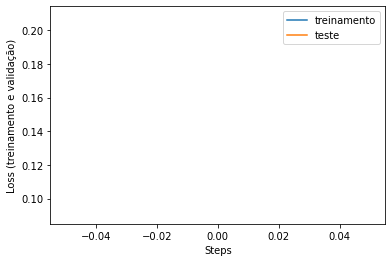

In [44]:
plt.figure()
plt.ylabel('Loss (treinamento e validação)')
plt.xlabel('Steps')
plt.plot(hist['loss'], label = 'treinamento')
plt.plot(hist['val_loss'], label = 'teste')
plt.legend();

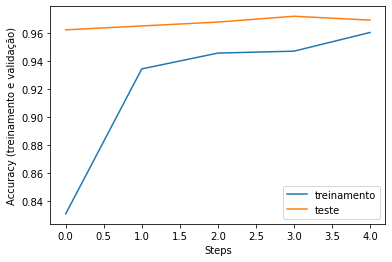

In [ ]:
plt.figure()
plt.ylabel('Accuracy (treinamento e validação)')
plt.xlabel('Steps')
plt.plot(hist['accuracy'], label = 'treinamento')
plt.plot(hist['val_accuracy'], label = 'teste')
plt.legend();

# Testes com imagens

In [45]:
X, y = next(iter(base_teste))

In [46]:
X

<tf.Tensor: shape=(16, 512, 512, 3), dtype=float32, numpy=
array([[[[0.7607844 , 0.5882353 , 0.8980393 ],
         [0.79862136, 0.61472124, 0.9283089 ],
         [0.7963083 , 0.5935356 , 0.91464466],
         ...,
         [0.3767004 , 0.3803922 , 0.59169734],
         [0.38011643, 0.38011643, 0.5837623 ],
         [0.37254903, 0.37254903, 0.5686275 ]],

        [[0.74904644, 0.57649744, 0.8863014 ],
         [0.7959437 , 0.6120435 , 0.92563117],
         [0.8050108 , 0.6022381 , 0.9233472 ],
         ...,
         [0.37918553, 0.3875725 , 0.5965301 ],
         [0.3848116 , 0.38950676, 0.59080505],
         [0.3772442 , 0.38193935, 0.57567024]],

        [[0.73728174, 0.560838  , 0.87194014],
         [0.795264  , 0.60872173, 0.9236076 ],
         [0.81947696, 0.61533   , 0.9365151 ],
         ...,
         [0.38222605, 0.3975036 , 0.603665  ],
         [0.39064738, 0.39974314, 0.5994674 ],
         [0.3855852 , 0.39342833, 0.5855852 ]],

        ...,

        [[0.15824144, 0.09022289,

In [47]:
X.shape

TensorShape([16, 512, 512, 3])

In [48]:
y

<tf.Tensor: shape=(16, 5), dtype=float32, numpy=
array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)>

In [49]:
y.shape

TensorShape([16, 5])

In [50]:
imagem = X[0, :, :, :]
imagem

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.7607844 , 0.5882353 , 0.8980393 ],
        [0.79862136, 0.61472124, 0.9283089 ],
        [0.7963083 , 0.5935356 , 0.91464466],
        ...,
        [0.3767004 , 0.3803922 , 0.59169734],
        [0.38011643, 0.38011643, 0.5837623 ],
        [0.37254903, 0.37254903, 0.5686275 ]],

       [[0.74904644, 0.57649744, 0.8863014 ],
        [0.7959437 , 0.6120435 , 0.92563117],
        [0.8050108 , 0.6022381 , 0.9233472 ],
        ...,
        [0.37918553, 0.3875725 , 0.5965301 ],
        [0.3848116 , 0.38950676, 0.59080505],
        [0.3772442 , 0.38193935, 0.57567024]],

       [[0.73728174, 0.560838  , 0.87194014],
        [0.795264  , 0.60872173, 0.9236076 ],
        [0.81947696, 0.61533   , 0.9365151 ],
        ...,
        [0.38222605, 0.3975036 , 0.603665  ],
        [0.39064738, 0.39974314, 0.5994674 ],
        [0.3855852 , 0.39342833, 0.5855852 ]],

       ...,

       [[0.15824144, 0.09022289, 0.17000614],
        [0.25

In [51]:
y_true = np.argmax(y[0])
y_true

2

In [52]:
classes[y_true]

'roses'

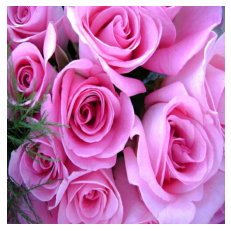

In [53]:
plt.imshow(imagem)
plt.axis('off');

In [54]:
imagem.shape

TensorShape([512, 512, 3])

In [55]:
imagem = np.expand_dims(imagem, axis = 0)
imagem.shape

(1, 512, 512, 3)

In [56]:
previsao = modelo.predict(imagem)
previsao

array([[-4.672008 , -6.329698 ,  7.9592915, -7.0978703, -5.4641237]],
      dtype=float32)

In [57]:
previsao = np.argmax(previsao)
previsao

2

In [58]:
print('Classe correta: ', classes[y_true])
print('Previsão: ', classes[previsao])

Classe correta:  roses
Previsão:  roses


In [59]:
modelo.save('/content/model')

INFO:tensorflow:Assets written to: /content/model/assets


INFO:tensorflow:Assets written to: /content/model/assets


In [60]:
modelo_carregado = tf.keras.models.load_model('/content/model')

In [61]:
modelo_carregado.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              207615832 
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 207,622,237
Trainable params: 6,405
Non-trainable params: 207,615,832
_________________________________________________________________


In [62]:
previsao = classes[np.argmax(modelo_carregado.predict(imagem))]
print('Classe correta: ', classes[y_true])
print('Previsão: ', previsao)

Classe correta:  roses
Previsão:  roses


# 2. DETECTION DES OBJETS

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf
import tensorflow_hub as hub
print('Versão do TensorFlow: ', tf.__version__)
print('Versão do TensorFlow Hub:', hub.__version__)

Versão do TensorFlow:  2.8.2
Versão do TensorFlow Hub: 0.12.0


# Configurações do TensorFlow Hub

In [64]:
# Modelos disponíveis: https://tfhub.dev/tensorflow/collections/object_detection/1
links_modelos = {
'CenterNet HourGlass104 512x512' : 'https://tfhub.dev/tensorflow/centernet/hourglass_512x512/1',
'CenterNet HourGlass104 Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/hourglass_512x512_kpts/1',
'CenterNet HourGlass104 1024x1024' : 'https://tfhub.dev/tensorflow/centernet/hourglass_1024x1024/1',
'CenterNet HourGlass104 Keypoints 1024x1024' : 'https://tfhub.dev/tensorflow/centernet/hourglass_1024x1024_kpts/1',
'CenterNet Resnet50 V1 FPN 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v1_fpn_512x512/1',
'CenterNet Resnet50 V1 FPN Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v1_fpn_512x512_kpts/1',
'CenterNet Resnet101 V1 FPN 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet101v1_fpn_512x512/1',
'CenterNet Resnet50 V2 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v2_512x512/1',
'CenterNet Resnet50 V2 Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v2_512x512_kpts/1',
'EfficientDet D0 512x512' : 'https://tfhub.dev/tensorflow/efficientdet/d0/1',
'EfficientDet D1 640x640' : 'https://tfhub.dev/tensorflow/efficientdet/d1/1',
'EfficientDet D2 768x768' : 'https://tfhub.dev/tensorflow/efficientdet/d2/1',
'EfficientDet D3 896x896' : 'https://tfhub.dev/tensorflow/efficientdet/d3/1',
'EfficientDet D4 1024x1024' : 'https://tfhub.dev/tensorflow/efficientdet/d4/1',
'EfficientDet D5 1280x1280' : 'https://tfhub.dev/tensorflow/efficientdet/d5/1',
'EfficientDet D6 1280x1280' : 'https://tfhub.dev/tensorflow/efficientdet/d6/1',
'EfficientDet D7 1536x1536' : 'https://tfhub.dev/tensorflow/efficientdet/d7/1',
'SSD MobileNet v2 320x320' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2',
'SSD MobileNet V1 FPN 640x640' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v1/fpn_640x640/1',
'SSD MobileNet V2 FPNLite 320x320' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_320x320/1',
'SSD MobileNet V2 FPNLite 640x640' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_640x640/1',
'SSD ResNet50 V1 FPN 640x640 (RetinaNet50)' : 'https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_640x640/1',
'SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)' : 'https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_1024x1024/1',
'SSD ResNet101 V1 FPN 640x640 (RetinaNet101)' : 'https://tfhub.dev/tensorflow/retinanet/resnet101_v1_fpn_640x640/1',
'SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)' : 'https://tfhub.dev/tensorflow/retinanet/resnet101_v1_fpn_1024x1024/1',
'SSD ResNet152 V1 FPN 640x640 (RetinaNet152)' : 'https://tfhub.dev/tensorflow/retinanet/resnet152_v1_fpn_640x640/1',
'SSD ResNet152 V1 FPN 1024x1024 (RetinaNet152)' : 'https://tfhub.dev/tensorflow/retinanet/resnet152_v1_fpn_1024x1024/1',
'Faster R-CNN ResNet50 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1',
'Faster R-CNN ResNet50 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_1024x1024/1',
'Faster R-CNN ResNet50 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_800x1333/1',
'Faster R-CNN ResNet101 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_640x640/1',
'Faster R-CNN ResNet101 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_1024x1024/1',
'Faster R-CNN ResNet101 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_800x1333/1',
'Faster R-CNN ResNet152 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_640x640/1',
'Faster R-CNN ResNet152 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_1024x1024/1',
'Faster R-CNN ResNet152 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_800x1333/1',
'Faster R-CNN Inception ResNet V2 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1',
'Faster R-CNN Inception ResNet V2 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_1024x1024/1',
'Mask R-CNN Inception ResNet V2 1024x1024' : 'https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1'
}

In [65]:
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3442, done.
remote: Counting objects: 100% (3442/3442), done.
remote: Compressing objects: 100% (2885/2885), done.
remote: Total 3442 (delta 894), reused 1467 (delta 500), pack-reused 0
Receiving objects: 100% (3442/3442), 43.71 MiB | 12.44 MiB/s, done.
Resolving deltas: 100% (894/894), done.


In [ ]:
# https://linuxcommandlibrary.com/man/protoc
%%bash
sudo apt install -y protobuf-compiler
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

In [68]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils 
from object_detection.utils import ops

In [69]:
path_to_labels = '/content/models/research/object_detection/data/mscoco_label_map.pbtxt'
indices_classes = label_map_util.create_category_index_from_labelmap(path_to_labels, use_display_name=True)

In [70]:
indices_classes

{1: {'id': 1, 'name': 'person'},
 2: {'id': 2, 'name': 'bicycle'},
 3: {'id': 3, 'name': 'car'},
 4: {'id': 4, 'name': 'motorcycle'},
 5: {'id': 5, 'name': 'airplane'},
 6: {'id': 6, 'name': 'bus'},
 7: {'id': 7, 'name': 'train'},
 8: {'id': 8, 'name': 'truck'},
 9: {'id': 9, 'name': 'boat'},
 10: {'id': 10, 'name': 'traffic light'},
 11: {'id': 11, 'name': 'fire hydrant'},
 13: {'id': 13, 'name': 'stop sign'},
 14: {'id': 14, 'name': 'parking meter'},
 15: {'id': 15, 'name': 'bench'},
 16: {'id': 16, 'name': 'bird'},
 17: {'id': 17, 'name': 'cat'},
 18: {'id': 18, 'name': 'dog'},
 19: {'id': 19, 'name': 'horse'},
 20: {'id': 20, 'name': 'sheep'},
 21: {'id': 21, 'name': 'cow'},
 22: {'id': 22, 'name': 'elephant'},
 23: {'id': 23, 'name': 'bear'},
 24: {'id': 24, 'name': 'zebra'},
 25: {'id': 25, 'name': 'giraffe'},
 27: {'id': 27, 'name': 'backpack'},
 28: {'id': 28, 'name': 'umbrella'},
 31: {'id': 31, 'name': 'handbag'},
 32: {'id': 32, 'name': 'tie'},
 33: {'id': 33, 'name': 'suitc

In [71]:
nome_modelo = 'CenterNet HourGlass104 Keypoints 512x512' # @param ['CenterNet HourGlass104 512x512','CenterNet HourGlass104 Keypoints 512x512','CenterNet HourGlass104 1024x1024','CenterNet HourGlass104 Keypoints 1024x1024','CenterNet Resnet50 V1 FPN 512x512','CenterNet Resnet50 V1 FPN Keypoints 512x512','CenterNet Resnet101 V1 FPN 512x512','CenterNet Resnet50 V2 512x512','CenterNet Resnet50 V2 Keypoints 512x512','EfficientDet D0 512x512','EfficientDet D1 640x640','EfficientDet D2 768x768','EfficientDet D3 896x896','EfficientDet D4 1024x1024','EfficientDet D5 1280x1280','EfficientDet D6 1280x1280','EfficientDet D7 1536x1536','SSD MobileNet v2 320x320','SSD MobileNet V1 FPN 640x640','SSD MobileNet V2 FPNLite 320x320','SSD MobileNet V2 FPNLite 640x640','SSD ResNet50 V1 FPN 640x640 (RetinaNet50)','SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)','SSD ResNet101 V1 FPN 640x640 (RetinaNet101)','SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)','SSD ResNet152 V1 FPN 640x640 (RetinaNet152)','SSD ResNet152 V1 FPN 1024x1024 (RetinaNet152)','Faster R-CNN ResNet50 V1 640x640','Faster R-CNN ResNet50 V1 1024x1024','Faster R-CNN ResNet50 V1 800x1333','Faster R-CNN ResNet101 V1 640x640','Faster R-CNN ResNet101 V1 1024x1024','Faster R-CNN ResNet101 V1 800x1333','Faster R-CNN ResNet152 V1 640x640','Faster R-CNN ResNet152 V1 1024x1024','Faster R-CNN ResNet152 V1 800x1333','Faster R-CNN Inception ResNet V2 640x640','Faster R-CNN Inception ResNet V2 1024x1024','Mask R-CNN Inception ResNet V2 1024x1024']

In [72]:
lista = '1' # @param [1,3,4,'AMI']

In [73]:
caminho_modelo = links_modelos[nome_modelo]

In [74]:
print('Modelo utilizado: ', nome_modelo)
print('Caminho modelo: ', caminho_modelo)

Modelo utilizado:  CenterNet HourGlass104 Keypoints 512x512
Caminho modelo:  https://tfhub.dev/tensorflow/centernet/hourglass_512x512_kpts/1


In [ ]:
modelo = hub.load(caminho_modelo)

# Carregamento da imagem de teste

In [ ]:
#On va charger une image pour pouvoir y detectet les ses differents objets, on regarde d abord son type (en PIL par defaut) qu on doit
#convertir a numpy avant de le passer a l algo.

In [77]:
imagem = Image.open('/content/japan-ge4b4bff1a_1280.jpg')

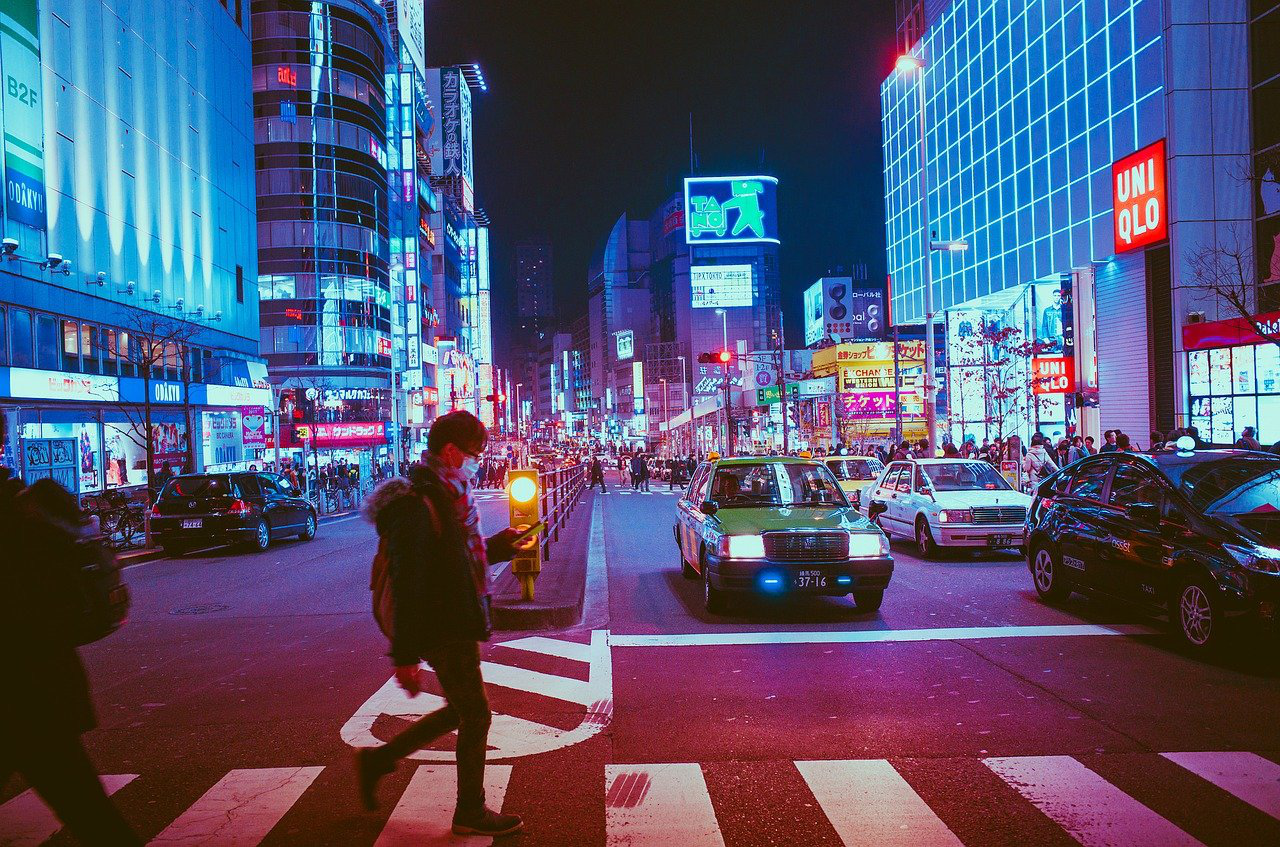

In [78]:
imagem

In [79]:
imagem.size

(1280, 847)

In [80]:
type(imagem)

PIL.JpegImagePlugin.JpegImageFile

In [81]:
(largura, altura) = imagem.size
print(largura, altura)

1280 847


In [82]:
imagem = np.array(imagem.getdata()).reshape((1, altura, largura, 3)).astype(np.uint8)
imagem.shape

(1, 847, 1280, 3)

In [83]:
type(imagem)

numpy.ndarray

In [84]:
imagem

array([[[[  8, 109, 105],
         [  5, 106, 100],
         [  5, 106,  98],
         ...,
         [ 38,  27,   5],
         [ 37,  31,   0],
         [ 37,  32,   0]],

        [[  6, 109, 105],
         [  3, 108, 101],
         [  3, 109,  99],
         ...,
         [ 36,  25,   7],
         [ 31,  23,   0],
         [ 34,  27,   0]],

        [[  0, 109, 104],
         [  0, 108, 102],
         [  0, 109, 100],
         ...,
         [ 47,  35,  23],
         [ 46,  36,  27],
         [ 31,  20,  14]],

        ...,

        [[ 74,  39,  20],
         [ 65,  30,  10],
         [ 63,  28,   8],
         ...,
         [ 40,  26,   0],
         [ 39,  25,   0],
         [ 38,  24,   0]],

        [[ 67,  30,  11],
         [ 62,  27,   7],
         [ 65,  30,  10],
         ...,
         [ 40,  26,   0],
         [ 39,  25,   0],
         [ 39,  25,   0]],

        [[ 57,  20,   1],
         [ 53,  18,   0],
         [ 60,  25,   5],
         ...,
         [ 41,  27,   1],
        

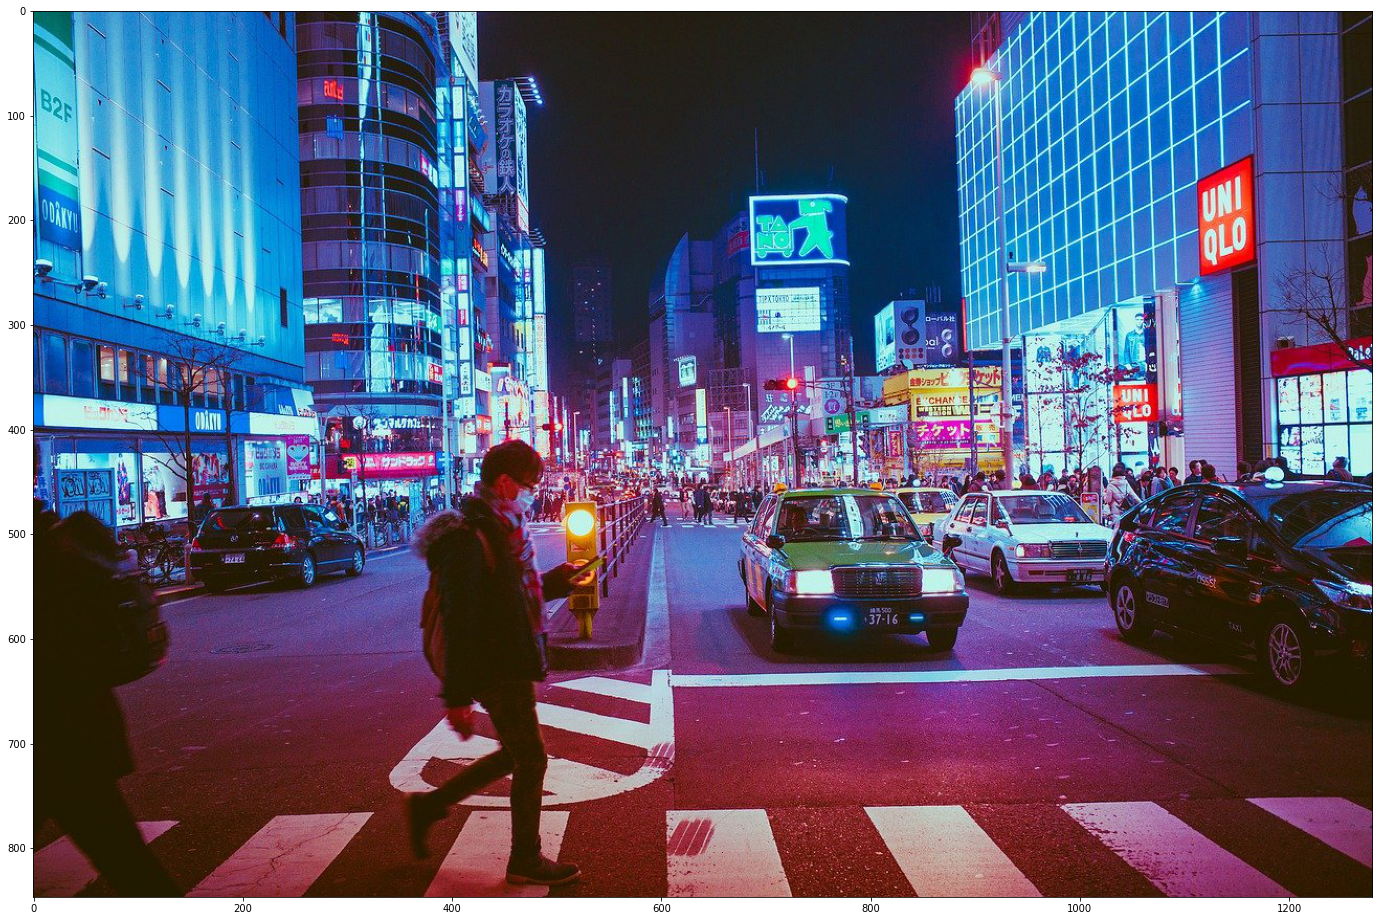

In [85]:
%matplotlib inline
plt.figure(figsize=(24,32))
plt.imshow(imagem[0])
plt.show()

In [ ]:
#OBS: on a pas besoin de normaliser l image ici car tensorglow hub via ses modeles de detectiont va le faire automatiquement

# Detecção de objetos

In [86]:
resultados = modelo(imagem)

In [87]:
indices_classes[3]

{'id': 3, 'name': 'car'}

In [88]:
resultados

{'detection_boxes': <tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
 array([[[0.535281  , 0.52452964, 0.73274297, 0.7002552 ],
         [0.5581469 , 0.11718841, 0.6594838 , 0.24883382],
         [0.48267204, 0.2827248 , 0.9880713 , 0.41381156],
         [0.53822255, 0.6755327 , 0.6603005 , 0.805894  ],
         [0.5313427 , 0.79917073, 0.7767344 , 1.        ],
         [0.55070376, 0.00265082, 0.9967069 , 0.11385085],
         [0.53377366, 0.49243987, 0.5815872 , 0.50543934],
         [0.41147017, 0.5609225 , 0.4316901 , 0.57142293],
         [0.507369  , 0.86010945, 0.53618145, 0.8770443 ],
         [0.5180052 , 0.8325517 , 0.55095744, 0.84651875],
         [0.5366544 , 0.45890743, 0.5782111 , 0.4708677 ],
         [0.5391929 , 0.6447879 , 0.6015409 , 0.69155324],
         [0.6217099 , 0.2886109 , 0.7620672 , 0.31367943],
         [0.5671434 , 0.15987945, 0.59275335, 0.17509225],
         [0.51700807, 0.73642135, 0.54106313, 0.75031054],
         [0.5579081 , 0.49683255, 0.584253

In [89]:
resultado = {chave:valor.numpy() for chave, valor in resultados.items()}
print(resultado.keys())

dict_keys(['detection_classes', 'detection_keypoints', 'detection_scores', 'detection_keypoint_scores', 'detection_boxes', 'num_detections'])


In [90]:
resultado

{'detection_boxes': array([[[0.535281  , 0.52452964, 0.73274297, 0.7002552 ],
         [0.5581469 , 0.11718841, 0.6594838 , 0.24883382],
         [0.48267204, 0.2827248 , 0.9880713 , 0.41381156],
         [0.53822255, 0.6755327 , 0.6603005 , 0.805894  ],
         [0.5313427 , 0.79917073, 0.7767344 , 1.        ],
         [0.55070376, 0.00265082, 0.9967069 , 0.11385085],
         [0.53377366, 0.49243987, 0.5815872 , 0.50543934],
         [0.41147017, 0.5609225 , 0.4316901 , 0.57142293],
         [0.507369  , 0.86010945, 0.53618145, 0.8770443 ],
         [0.5180052 , 0.8325517 , 0.55095744, 0.84651875],
         [0.5366544 , 0.45890743, 0.5782111 , 0.4708677 ],
         [0.5391929 , 0.6447879 , 0.6015409 , 0.69155324],
         [0.6217099 , 0.2886109 , 0.7620672 , 0.31367943],
         [0.5671434 , 0.15987945, 0.59275335, 0.17509225],
         [0.51700807, 0.73642135, 0.54106313, 0.75031054],
         [0.5579081 , 0.49683255, 0.58425343, 0.50899154],
         [0.5474448 , 0.39346945, 0.6

In [91]:
imagem.shape

(1, 847, 1280, 3)

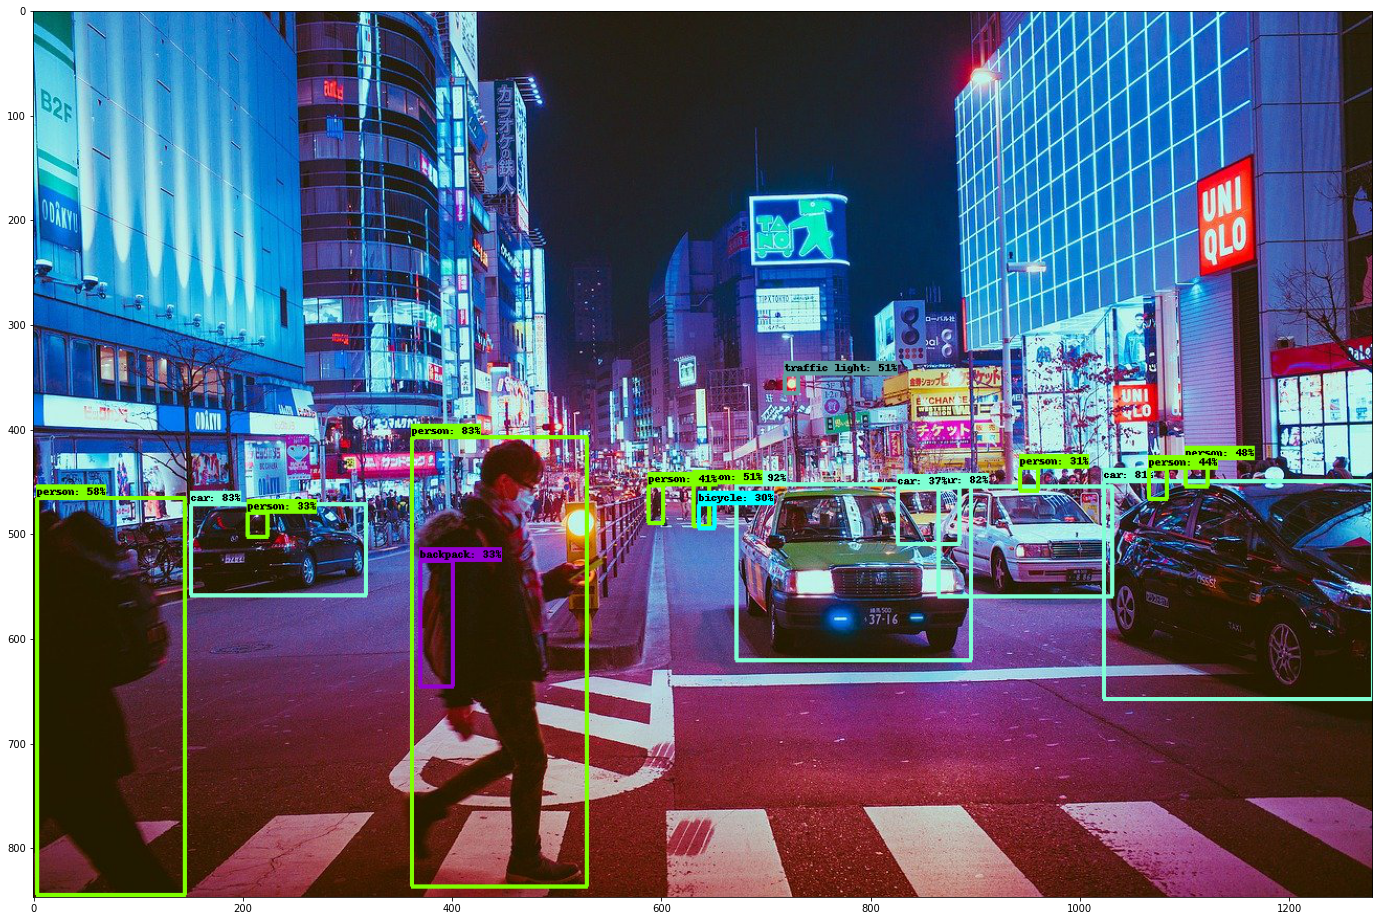

In [92]:
imagem_deteccoes = imagem.copy()
visualization_utils.visualize_boxes_and_labels_on_image_array(
    imagem_deteccoes[0],
    resultado['detection_boxes'][0],
    (resultado['detection_classes'][0]).astype(int),
    resultado['detection_scores'][0],
    indices_classes,
    max_boxes_to_draw=200,
    use_normalized_coordinates=True,
    min_score_thresh=.30
)

plt.figure(figsize=(24,32))
plt.imshow(imagem_deteccoes[0])
plt.show()